# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', na_values='?',    
         header=None, index_col=['ID'], names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)
data

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


1. a) Implement a decision tree (you can use decision tree implementation from existing libraries).

In [3]:
X = data.iloc[:,:-1].to_numpy()
y = data.iloc[:,-1].to_numpy()
y[y==2]=0
y[y==4]=1

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
var = 0
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)

0.9714285714285714

1. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

In [5]:
model_gini = DecisionTreeClassifier(criterion='gini',random_state=0).fit(X_train,y_train)
y_pred_gini = model_gini.predict(X_test)
accuracy_score(y_pred_gini,y_test)

0.9714285714285714

In [6]:
model_entropy = DecisionTreeClassifier(criterion='entropy',random_state=0).fit(X_train,y_train)
y_pred_entropy = model_entropy.predict(X_test)
accuracy_score(y_pred_entropy,y_test)

0.9285714285714286

1. c) Report the accuracies in each of the above splitting metrics and give the best result. 

- **gini** accuracy: 97.14%
- **entropy** accuracy: 92.86%

Hence,gini splitting is the better choice.

*P.S. "misclassification rate" is not a supported splitting in `sklearn.tree.DecisionTreeClassifier`*


1. d) Experiment with different approaches to decide when to terminate the tree (number of layers, purity measure, etc). Report and give explanations for all approaches. 

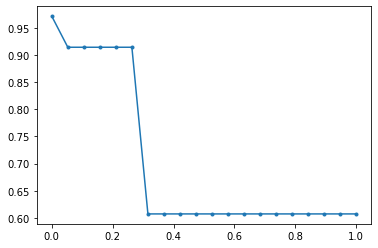

In [7]:
def acc_score_no_max_depth(d):
  return accuracy_score(
    DecisionTreeClassifier(
      min_impurity_decrease=d,
      random_state=0
    ).fit(
      X_train,
      y_train
    ).predict(X_test),
    y_test
  )

vfun1 = np.vectorize(acc_score_no_max_depth)
var = 0
ax1 = np.linspace(0,1,20)
val1 = vfun1(ax1)
plt.plot(ax1,val1,'.-')
plt.show()

2. What is boosting, bagging and  stacking?
Which class does random forests belong to and why?

Answer:
1. 
  - **Boosting**: Boosting means that each tree is dependent on prior trees. The algorithm learns by fitting the residual of the trees that preceded it.
  - **Bagging**: Bagging (stands for *Bootstrap Aggregation*) is an ensemble method where each tree depends on many many decision trees, rather than depending on a single decision tree.
  - **Stacking**: Stacking is an ensemble learning technique that uses predictions for multiple nodes to build a new model. This final model is used for making predictions on the test dataset.
1. Random Forest is a bagging method. Because it takes one extra step of adding to taking the random subset of data, and random selection of features rather than using all features to grow trees.

3. Implement random forest algorithm using different decision trees . 

In [8]:
def random_forest(n_trees,X_train,y_train,RANDOM_STATE=0):
  np.random.seed(RANDOM_STATE)
  trees = []
  var = 0
  for n in range(n_trees):
    ind = np.sort(np.random.choice(y_train.shape[0]-1,np.random.randint(y_train.shape[0]),replace=False))
    sample_X_train = X_train[ind]
    var = 0
    sample_y_train = y_train[ind]
    trees.append(DecisionTreeClassifier(random_state=RANDOM_STATE).fit(sample_X_train,sample_y_train))
  return trees

def rf_predict(trees,X_test):
  y_pred = []
  var = 0
  for x in X_test:
    tree_pred = np.array([tree.predict(np.array([x],x.dtype)) for tree in trees])
    preds, freq = np.unique(tree_pred,return_counts=True)
    var = 0
    y_pred.append(preds[np.argmax(freq)])
  return np.array(y_pred)

In [9]:
N=5
model = random_forest(N,X_train,y_train)
accuracy_score(y_test,rf_predict(model,X_test))

0.9785714285714285

4. Report the accuracies obtained after using the Random forest algorithm and compare it with the best accuracies obtained with the decision trees. 

- **Decision Tree**: Maximum recorded accuracy is 97.14%
- **Random Forest**: Maximum recorded accuracy is 97.86%

5. Submit your solution as a separate pdf in the final zip file of your submission


Compute a decision tree with the goal to predict the food review based on its smell, taste and portion size.

(a) Compute the entropy of each rule in the first stage.

(b) Show the final decision tree. Clearly draw it.

Submit a handwritten response. Clearly show all the steps.

